# Предварительный анализ данных

Для начала импортируем все необходимые библиотеки для предварительного анализа данных (для работы с таблицами, векторами и матрицами, для построения графиков и корреляционных матриц)

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)
pd.options.display.float_format = '{:.2f}'.format
from matplotlib import pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Откроем датасет (в кавычках указан путь к файлу на моем копмьютере, нужно его заменить), указанные параметры - параметры открытия файла csv. Если русские символы декодируются неправильно или что-то ломается - следует убрать " engine='python' ". Далее открываем датасет

In [3]:
df=pd.read_excel('dataset_new.xlsx')
df

,№,Наименование,Год,"Возраст компании, лет",Статус,Организационно-правовая форма,Форма собственности,"Оборотные активы, RUB","Активы всего, RUB","Нераспределенная прибыль (непокрытый убыток), RUB","Долгосрочные обязательства, RUB","Краткосрочные обязательства, RUB","Совокупный долг, RUB","Выручка, RUB",Коэффициент оборачиваемости совокупных активов,Оборотные активы/ТА,Нераспределенная прибыль (непокрытый убыток)/ТА,Долгосрочные обязательства/ТА,Краткосрочные обязательства/ТА,Совокупный долг/ТА,Выручка/ТА,Гос собственность,Частичная,Частная,АО,Гос собственность.1,Сельское хозво,Неком,Кооперативы,ООО
0,1,"(ТУЛАТЕХМАШ), АО",19,29.00,1,0,0,192345000,228294000,-32949000,93533000,158381000,251914000,36594000,0.14,0.84,-0.14,0.41,0.69,1.10,0.16,0,0,1,1,0,0,0,0,0
1,2,"18 ЦАРЗ, АО",19,11.50,1,0,2,79057000,507607000,-375469000,9007000,466916000,475923000,2173000,0.00,0.35,-1.64,0.04,2.05,2.08,0.01,0,0,0,1,0,0,0,0,0
2,3,"39 АРСЕНАЛ, АО",19,26.50,1,0,1,209931000,286396000,-199177000,168000,456867000,457035000,44035000,0.15,0.92,-0.87,0.00,2.00,2.00,0.19,1,2,0,1,0,0,0,0,0
3,4,"94 АРЗ, АО",19,25.50,1,0,1,10463000,233053000,-175760000,1195000,218191000,219386000,3757000,0.02,0.05,-0.77,0.01,0.96,0.96,0.02,1,2,0,1,0,0,0,0,0
4,5,"АБСОЛЮТ, ООО",19,27.00,1,5,0,63009000,160632000,-78300000,6471000,206861000,213332000,2461000,0.01,0.28,-0.34,0.03,0.91,0.93,0.01,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19661,19662,"4ФРЭШ, ООО",20,1.50,0,5,0,151849000,166295000,14723000,144000,151378000,151522000,771586000,5.33,0.67,0.06,0.00,0.66,0.66,3.38,0,0,1,0,0,0,0,0,1
19662,19663,"(КОЛХОЗ) ИМЕНИ ШЕВЧЕНКО, СПК",20,28.00,0,2,0,222633000,472009000,363265000,75981000,8769000,84750000,311983000,0.72,0.98,1.59,0.33,0.04,0.37,1.37,0,0,1,0,0,1,0,0,0
19663,19664,"ТЭС, АО",20,10.50,1,0,0,79877000,87991000,-21156000,1000,108074000,108075000,17238000,0.15,0.35,-0.09,0.00,0.47,0.47,0.08,0,0,1,1,0,0,0,0,0
19664,19665,"СФЕРА УПАКОВКИ, ООО",20,5.00,1,5,0,168824000,168824000,4711000,2059000,161944000,164003000,121213000,0.69,0.74,0.02,0.01,0.71,0.72,0.53,0,0,1,0,0,0,0,0,1


Смотрим на данные. Типы числовых данных должны быть типами "int64" или "float64"

In [4]:
for i in df.columns:
    print(df[i].dtype, ':', i)

int64 : №
object : Наименование
int64 : Год
float64 : Возраст компании, лет
int64 : Статус
int64 : Организационно-правовая форма
int64 : Форма собственности
int64 : Оборотные активы, RUB
int64 : Активы  всего, RUB
int64 : Нераспределенная прибыль (непокрытый убыток), RUB
int64 : Долгосрочные обязательства, RUB
int64 : Краткосрочные обязательства, RUB
int64 : Совокупный долг, RUB
int64 : Выручка, RUB
float64 : Коэффициент оборачиваемости совокупных активов
float64 : Оборотные активы/ТА
float64 : Нераспределенная прибыль (непокрытый убыток)/ТА
float64 : Долгосрочные обязательства/ТА
float64 : Краткосрочные обязательства/ТА
float64 : Совокупный долг/ТА
float64 : Выручка/ТА
int64 : Гос собственность
int64 : Частичная
int64 : Частная
int64 : АО
int64 : Гос собственность.1
int64 : Сельское хозво
int64 : Неком
int64 : Кооперативы
int64 : ООО


Далее убираем все пустые значения, создаем отдельный столбец данных Y = "статус" и убираем статус из датасета

In [5]:
df = df.dropna()

In [6]:
data = df.copy()
Y = data['Статус']
data = data.drop(['Статус'], axis=1)

Создаем датасет data_num только с числовыми данными. Также уберем из датасета категориальные переменные:

'Организационно-правовая форма', 'Форма собственности'

In [7]:
data_num = data.copy()
data_num = data_num.drop(['№','Наименование', 'Организационно-правовая форма', 'Форма собственности'], axis = 1)

## Таблица из числовых значений

In [8]:
data_num

,Год,"Возраст компании, лет","Оборотные активы, RUB","Активы всего, RUB","Нераспределенная прибыль (непокрытый убыток), RUB","Долгосрочные обязательства, RUB","Краткосрочные обязательства, RUB","Совокупный долг, RUB","Выручка, RUB",Коэффициент оборачиваемости совокупных активов,Оборотные активы/ТА,Нераспределенная прибыль (непокрытый убыток)/ТА,Долгосрочные обязательства/ТА,Краткосрочные обязательства/ТА,Совокупный долг/ТА,Выручка/ТА,Гос собственность,Частичная,Частная,АО,Гос собственность.1,Сельское хозво,Неком,Кооперативы,ООО
0,19,29.00,192345000,228294000,-32949000,93533000,158381000,251914000,36594000,0.14,0.84,-0.14,0.41,0.69,1.10,0.16,0,0,1,1,0,0,0,0,0
1,19,11.50,79057000,507607000,-375469000,9007000,466916000,475923000,2173000,0.00,0.35,-1.64,0.04,2.05,2.08,0.01,0,0,0,1,0,0,0,0,0
2,19,26.50,209931000,286396000,-199177000,168000,456867000,457035000,44035000,0.15,0.92,-0.87,0.00,2.00,2.00,0.19,1,2,0,1,0,0,0,0,0
3,19,25.50,10463000,233053000,-175760000,1195000,218191000,219386000,3757000,0.02,0.05,-0.77,0.01,0.96,0.96,0.02,1,2,0,1,0,0,0,0,0
4,19,27.00,63009000,160632000,-78300000,6471000,206861000,213332000,2461000,0.01,0.28,-0.34,0.03,0.91,0.93,0.01,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19661,20,1.50,151849000,166295000,14723000,144000,151378000,151522000,771586000,5.33,0.67,0.06,0.00,0.66,0.66,3.38,0,0,1,0,0,0,0,0,1
19662,20,28.00,222633000,472009000,363265000,75981000,8769000,84750000,311983000,0.72,0.98,1.59,0.33,0.04,0.37,1.37,0,0,1,0,0,1,0,0,0
19663,20,10.50,79877000,87991000,-21156000,1000,108074000,108075000,17238000,0.15,0.35,-0.09,0.00,0.47,0.47,0.08,0,0,1,1,0,0,0,0,0
19664,20,5.00,168824000,168824000,4711000,2059000,161944000,164003000,121213000,0.69,0.74,0.02,0.01,0.71,0.72,0.53,0,0,1,0,0,0,0,0,1


Создаем корреляционную матрицу числовых переменных с переменной "статус", а также корреляционную матрицу числовых переменных между собой. Далее создадим список названий столбцов (переменных), чтобы с ними было удобно работать

После этого создадим датафрейм, где indicator - название переменной, value - коэфф корреляции с переменной "Статус"

In [9]:
corr_matr = data_num.corrwith(Y)

In [10]:
corr_matr = corr_matr.to_dict()

In [11]:
tab = {'indicator': list(corr_matr.keys()) , 'value': list(corr_matr.values())}
tabl = pd.DataFrame(tab, columns = ['indicator','value'])

In [12]:
tabl = tabl.sort_values(by=['value'])
tabl

,indicator,value
11,Нераспределенная прибыль (непокрытый убыток)/ТА,-0.27
4,"Нераспределенная прибыль (непокрытый убыток), RUB",-0.27
18,Частная,-0.11
21,Сельское хозво,-0.08
0,Год,-0.05
24,ООО,-0.03
22,Неком,-0.02
23,Кооперативы,-0.01
9,Коэффициент оборачиваемости совокупных активов,-0.00
1,"Возраст компании, лет",0.01


Посмотрим на переменные, у которых модуль коэффа корреляции с переменной "статус" больше 0.1

In [13]:
tabl[abs(tabl['value']) > 0.1]

,indicator,value
11,Нераспределенная прибыль (непокрытый убыток)/ТА,-0.27
4,"Нераспределенная прибыль (непокрытый убыток), RUB",-0.27
18,Частная,-0.11
19,АО,0.12
2,"Оборотные активы, RUB",0.20
10,Оборотные активы/ТА,0.20
5,"Долгосрочные обязательства, RUB",0.22
12,Долгосрочные обязательства/ТА,0.22
3,"Активы всего, RUB",0.23
6,"Краткосрочные обязательства, RUB",0.29


больше 0.05

In [14]:
tabl[abs(tabl['value']) > 0.05]

,indicator,value
11,Нераспределенная прибыль (непокрытый убыток)/ТА,-0.27
4,"Нераспределенная прибыль (непокрытый убыток), RUB",-0.27
18,Частная,-0.11
21,Сельское хозво,-0.08
16,Гос собственность,0.06
17,Частичная,0.06
20,Гос собственность.1,0.07
19,АО,0.12
2,"Оборотные активы, RUB",0.20
10,Оборотные активы/ТА,0.20


Теперь описательные статистики для всех переменных:

In [15]:
data_num.describe()

,Год,"Возраст компании, лет","Оборотные активы, RUB","Активы всего, RUB","Нераспределенная прибыль (непокрытый убыток), RUB","Долгосрочные обязательства, RUB","Краткосрочные обязательства, RUB","Совокупный долг, RUB","Выручка, RUB",Коэффициент оборачиваемости совокупных активов,Оборотные активы/ТА,Нераспределенная прибыль (непокрытый убыток)/ТА,Долгосрочные обязательства/ТА,Краткосрочные обязательства/ТА,Совокупный долг/ТА,Выручка/ТА,Гос собственность,Частичная,Частная,АО,Гос собственность.1,Сельское хозво,Неком,Кооперативы,ООО
count,19666.00,19666.00,19666.00,19666.00,19666.00,19666.00,19666.00,19666.00,19666.00,19666.00,19666.00,19666.00,19666.00,19666.00,19666.00,19666.00,19666.00,19666.00,19666.00,19666.00,19666.00,19666.00,19666.00,19666.00,19666.00
mean,19.07,14.82,104428823.03,166722448.60,50621003.82,33374367.82,67279184.45,100653552.27,168826949.66,3.73,0.46,0.22,0.15,0.29,0.44,0.74,0.01,0.01,0.98,0.09,0.01,0.11,0.01,0.00,0.78
std,0.25,8.59,314442157.52,398408275.63,127901247.78,133503299.90,298023141.27,364160863.03,409285491.70,233.35,1.38,0.56,0.58,1.31,1.60,1.79,0.08,0.17,0.12,0.29,0.08,0.31,0.11,0.05,0.41
min,19.00,0.00,364.00,998.00,-981735000.00,1000.00,1000.00,22000.00,912.00,0.00,0.00,-4.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,19.00,7.00,9354000.00,15399000.00,1750000.00,987000.00,2304000.00,5809000.00,14607250.00,0.50,0.04,0.01,0.00,0.01,0.03,0.06,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
50%,19.00,14.00,34442000.00,58630500.00,12825000.00,4861000.00,11430500.00,22124000.00,49886500.00,0.93,0.15,0.06,0.02,0.05,0.10,0.22,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
75%,19.00,21.50,112063500.00,187751250.00,59413250.00,21338500.00,49425750.00,84639750.00,152698750.00,2.46,0.49,0.26,0.09,0.22,0.37,0.67,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
max,20.00,62.50,18087643000.00,18419491000.00,3125829000.00,5655371000.00,18050202000.00,19280617000.00,19861922000.00,32722.20,79.23,13.69,24.77,79.07,84.46,87.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Корреляционная матрица всех коэффициентов:

In [16]:
cols = np.array(tabl.indicator)

<AxesSubplot:title={'center':'Pearson Correlation of Indicators'}>

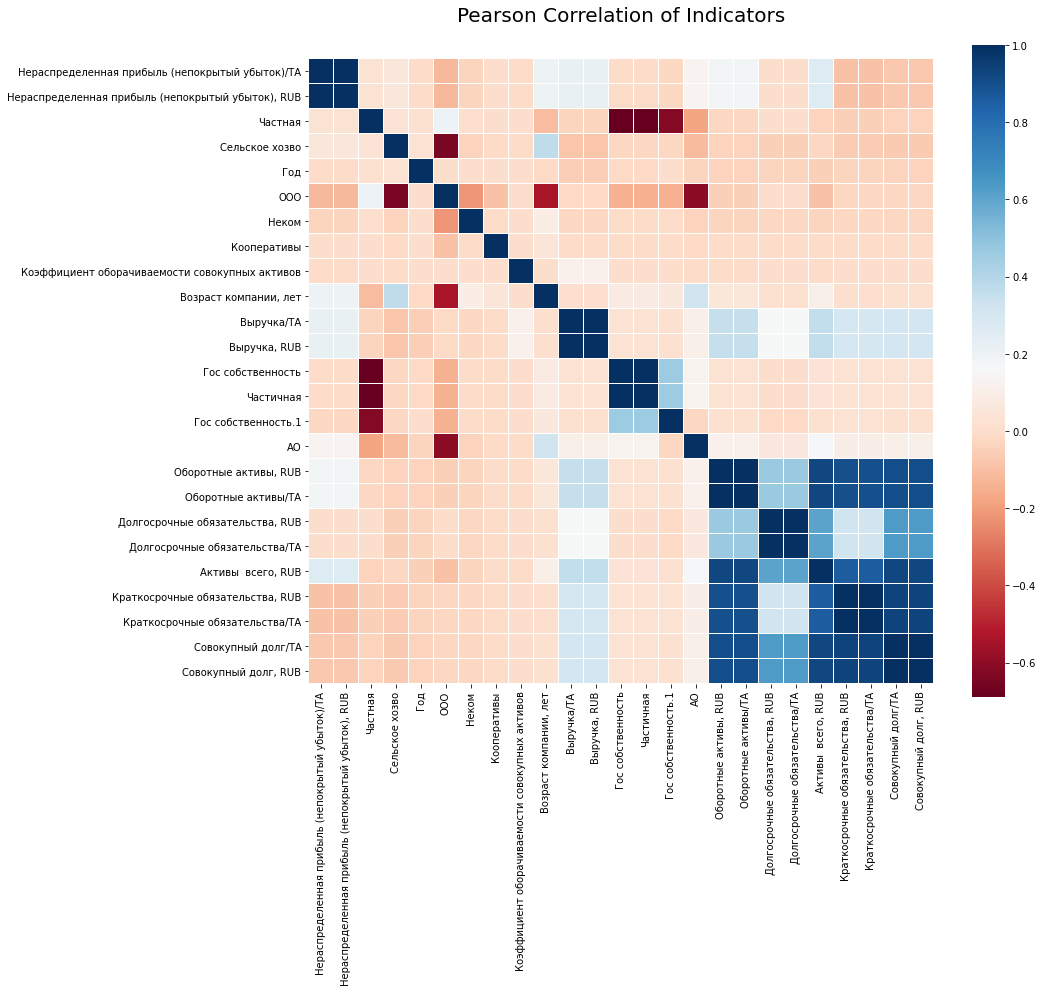

In [17]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Indicators', y=1.05, size=20)
sns.heatmap(data[cols].corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=False)

Теперь посмотрим на совместную корреляцию только тех коэффициентов, у которых модуль коэффициента корреляции с Y (статус) > 0.05

In [26]:
cols = np.array(tabl.indicator)
cols

array(['Нераспределенная прибыль (непокрытый убыток)/ТА',
       'Нераспределенная прибыль (непокрытый убыток), RUB', 'Частная',
       'Сельское хозво', 'Год', 'ООО', 'Неком', 'Кооперативы',
       'Коэффициент оборачиваемости совокупных активов',
       'Возраст компании, лет', 'Выручка/ТА', 'Выручка, RUB',
       'Гос собственность', 'Частичная', 'Гос собственность.1', 'АО',
       'Оборотные активы, RUB', 'Оборотные активы/ТА',
       'Долгосрочные обязательства, RUB', 'Долгосрочные обязательства/ТА',
       'Активы  всего, RUB', 'Краткосрочные обязательства, RUB',
       'Краткосрочные обязательства/ТА', 'Совокупный долг/ТА',
       'Совокупный долг, RUB'], dtype=object)

In [27]:
cols = np.delete(cols, [1, 2, 11, 13, 14, 16, 18,20, 21, 22, 23, 24])   
cols

array(['Нераспределенная прибыль (непокрытый убыток)/ТА',
       'Сельское хозво', 'Год', 'ООО', 'Неком', 'Кооперативы',
       'Коэффициент оборачиваемости совокупных активов',
       'Возраст компании, лет', 'Выручка/ТА', 'Гос собственность', 'АО',
       'Оборотные активы/ТА', 'Долгосрочные обязательства/ТА'],
      dtype=object)

<AxesSubplot:title={'center':'Pearson Correlation of Indicators'}>

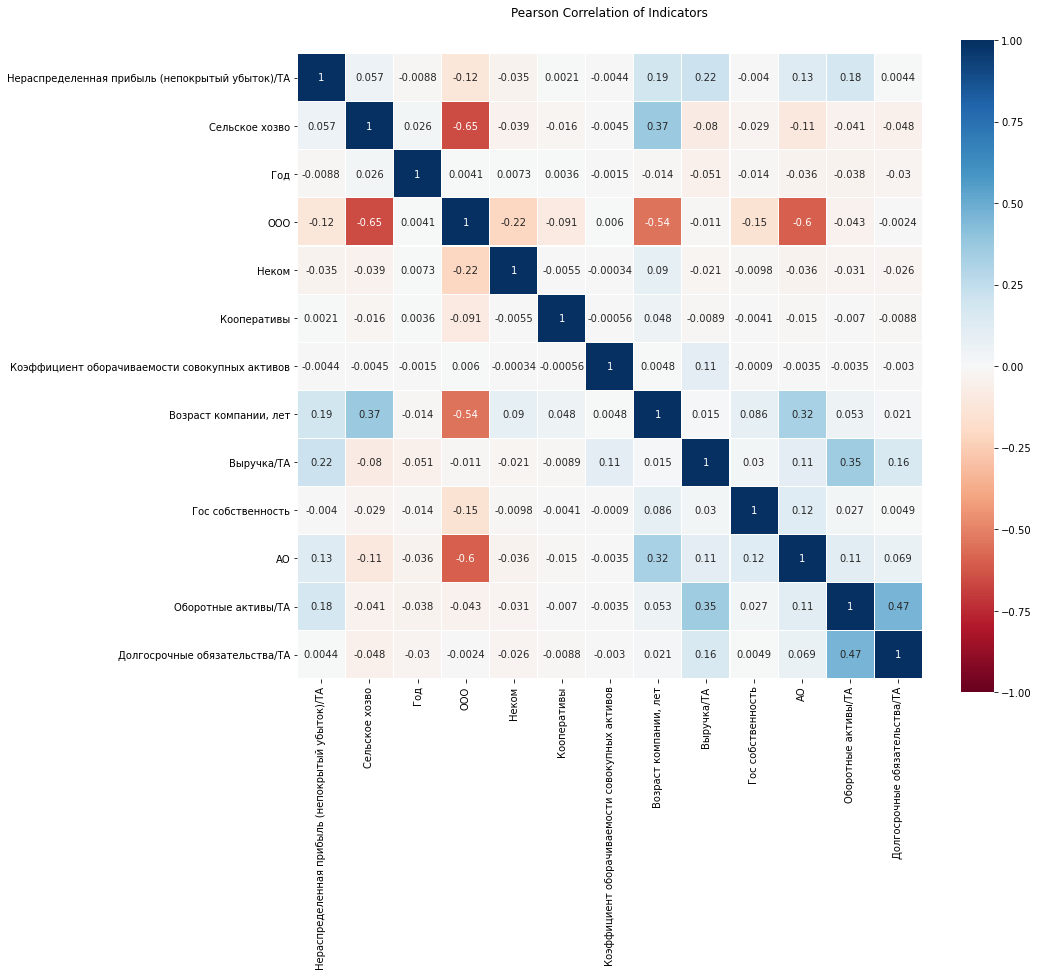

In [28]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Indicators', y=1.05, size=12)
sns.heatmap(data[cols].corr(),
            linewidths=0.1, vmax=1.0, vmin=-1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Видим, что год очень сильно коррелирует с данными. посмотрим на статистики коэффициентов в зависимости от года

In [20]:
data_num.groupby('Год').mean()

,"Возраст компании, лет","Оборотные активы, RUB","Активы всего, RUB","Нераспределенная прибыль (непокрытый убыток), RUB","Долгосрочные обязательства, RUB","Краткосрочные обязательства, RUB","Совокупный долг, RUB","Выручка, RUB",Коэффициент оборачиваемости совокупных активов,Оборотные активы/ТА,Нераспределенная прибыль (непокрытый убыток)/ТА,Долгосрочные обязательства/ТА,Краткосрочные обязательства/ТА,Совокупный долг/ТА,Выручка/ТА,Гос собственность,Частичная,Частная,АО,Гос собственность.1,Сельское хозво,Неком,Кооперативы,ООО
Год,,,,,,,,,,,,,,,,,,,,,,,,
19,14.85,107741920.55,171458557.67,50930144.53,34478195.06,70193745.03,104671940.09,174589978.74,3.83,0.47,0.22,0.15,0.31,0.46,0.76,0.01,0.02,0.98,0.09,0.01,0.10,0.01,0.00,0.78
20,14.37,60252579.45,103572026.24,46498977.41,18656134.84,28416960.64,47073095.48,91983761.66,2.42,0.26,0.20,0.08,0.12,0.21,0.40,0.00,0.01,0.99,0.05,0.01,0.13,0.02,0.00,0.79


Посмотрим соотношение банкротств/небанкротств в зависимости от года. Для наглядности сравним только 20 и 19 годы, по ним больше всего данных.

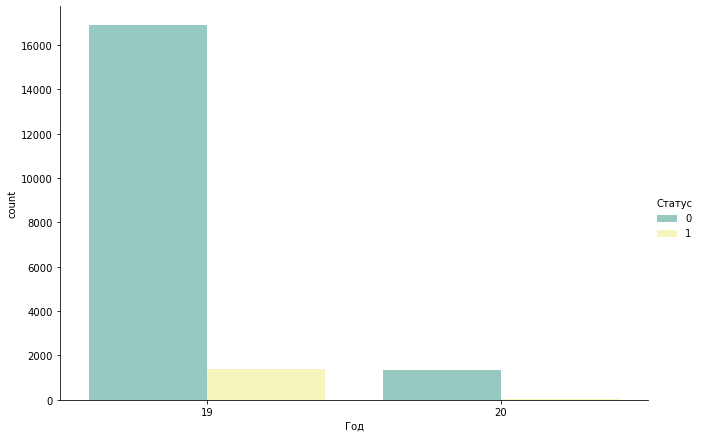

In [22]:
sns.catplot(x = 'Год', hue ="Статус", data=df, kind="count", height = 6, aspect = 1.5, palette = 'Set3', )
plt.show()

Доля банкротств в 19 и 20 годы по отдельности:

In [24]:
df.groupby(by=['Год'])['Статус'].mean()

Год
19   0.08
20   0.03
Name: Статус, dtype: float64

Интересно также посмотреть, как меняется в 2020 году, по сравнению с 2019 годом коэффициент оборачиваемости совокупных активов. Построим 2 графика в зависимости от статуса.

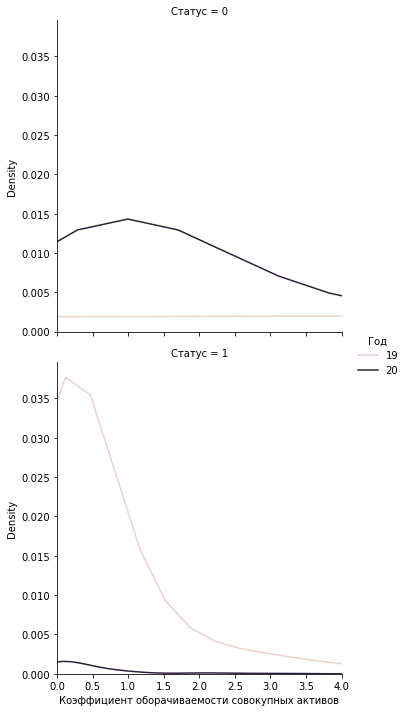

In [25]:
sns.displot(data=df, x="Коэффициент оборачиваемости совокупных активов",  hue="Год", row ='Статус', kind="kde")
plt.xlim(0, 4)
plt.show()